In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

file = '../files/sample.wav'

In [2]:
audio, sr = librosa.load(file)

spectrogram = np.abs(librosa.stft(audio))
energia = librosa.feature.rms(S=spectrogram)

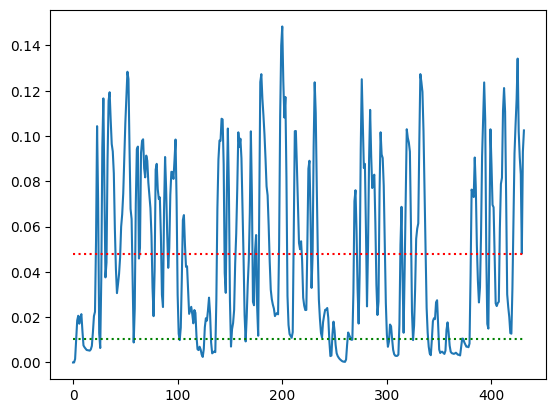

In [3]:
plt.plot(energia[0])
plt.plot([np.mean(energia) for _ in energia[0]], linestyle = 'dotted', color='red')
plt.plot([np.mean(energia)-1*np.std(energia) for _ in energia[0]], linestyle = 'dotted', color='green')

In [4]:
limiar_energia = np.mean(energia) - 1*np.std(energia)
tamanho_minimo_pausa = 0.15

pausas = []
no_pausa = False
for i, e in enumerate(energia[0]):
    if e < limiar_energia:
        if not no_pausa:
            inicio = librosa.frames_to_time(i)
            no_pausa = True
    else:
        if no_pausa:
            fim = librosa.frames_to_time(i)
            pausas.append((inicio, fim))
            no_pausa = False

pausas = [pausa for pausa in pausas if pausa[1]-pausa[0] > tamanho_minimo_pausa]
print("Pausas:")
for pausa in pausas:
    print("Início:", round(pausa[0],2), "Fim:", round(pausa[1],2))


Pausas:
Início: 0.23 Fim: 0.44
Início: 2.76 Fim: 2.93
Início: 5.83 Fim: 6.11
Início: 8.13 Fim: 8.29
Início: 8.36 Fim: 8.64


In [11]:
[(p1[1], p2[0]) for p1, p2 in zip(pausas[:-1], pausas[1:]) if p2[0]-p1[1] > tamanho_minimo_pausa]

[(0.44117913832199546, 2.7631746031746034),
 (2.9257142857142857, 5.828208616780046),
 (6.106848072562358, 8.126984126984127)]